In [19]:
import numpy as np
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

bmi_prediction = pd.read_csv("dataset/BMI-Index.csv")

In [4]:
bmi_prediction.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [2]:
bmi_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [3]:
bmi_prediction.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [5]:
bmi_prediction.count()

Gender    500
Height    500
Weight    500
Index     500
dtype: int64

In [6]:
bmi_prediction.shape

(500, 4)

In [7]:
bmi_prediction.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [9]:
bmi_prediction.groupby("Index").size()

Index
0     13
1     22
2     69
3     68
4    130
5    198
dtype: int64

In [10]:
corr_matrix = bmi_prediction.corr()
corr_matrix["Index"].sort_values(ascending=False)

Index     1.000000
Weight    0.804569
Height   -0.422223
Name: Index, dtype: float64

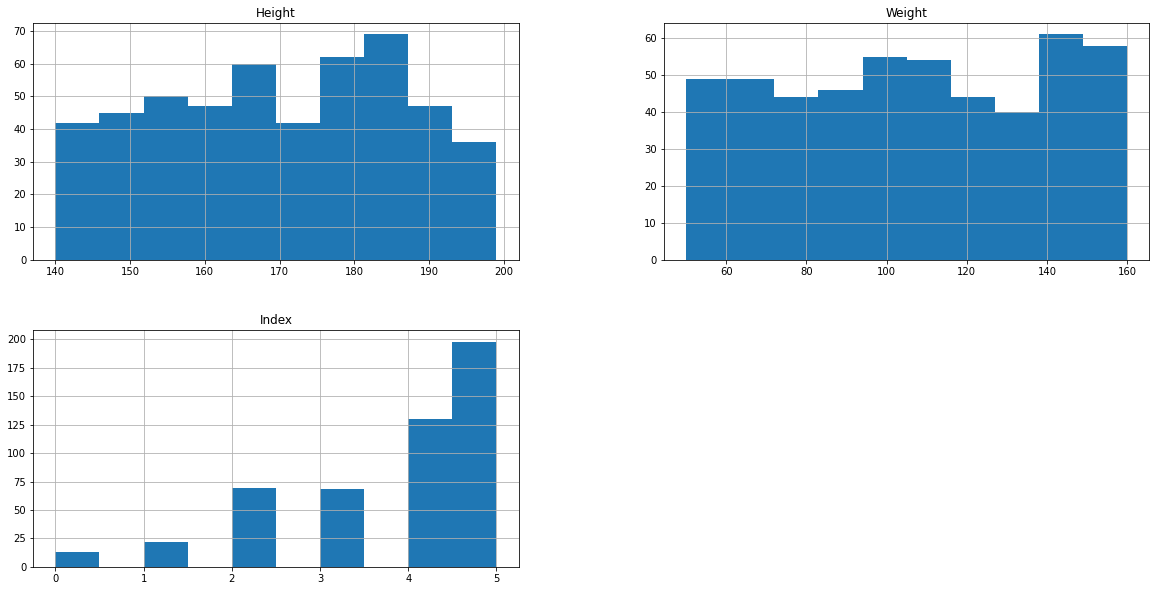

In [13]:
bmi_prediction.hist(bins=10,figsize=(20, 10))
plt.show()

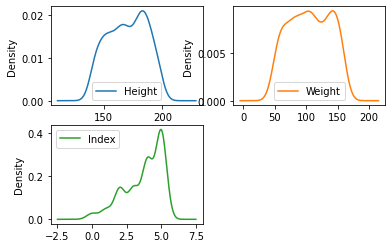

In [17]:
bmi_prediction.plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()

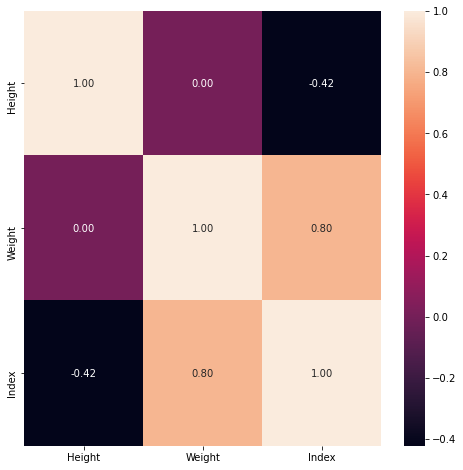

In [22]:
colum_names = [ 'Height', 'Weight', 'Index']
correlations = bmi_prediction.corr()
# Plot figsize
fig, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(correlations, annot=True, fmt=".2f")
ax.set_xticklabels(colum_names);
ax.set_yticklabels(colum_names);
plt.show()

In [23]:
X = bmi_prediction[['Height', 'Weight']]
y = bmi_prediction['Index']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=3)

In [25]:
lm = LogisticRegression(solver='liblinear')

In [26]:
lm.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [27]:
print(lm.predict(X_test))

[5 4 4 5 5 2 5 2 5 4 5 5 2 4 2 4 5 5 5 5 5 4 2 4 2 5 5 2 5 4 5 4 5 4 4 5 5
 4 2 5 5 5 2 4 5 4 5 4 5 5 5 5 4 5 5 5 4 4 2 4 5 2 5 4 2 5 4 5 5 2 2 2 4 4
 4 4 4 4 5 2 5 5 2 5 5 2 4 4 4 5 4 4 5 5 5 5 4 4 5 4 2 4 5 4 2 5 0 2 0 5 4
 4 2 4 5 0 4 4 2 5 5 4 2 4 4 4 4 2 2 5 5 2 4 4 2 5 5 5 5 4 5 5 5 2 5 5 5 2
 2 5 2 4 5 4 5 5 4 2 4 5 5 5 5 5 4 5 4 2 4 4 5 4 2 5 5 2 5 2 4 4 4 5 2 5 5
 5 5 5 5 5 4 5 5 5 5 5 4 4 5 5]


In [29]:
pickle.dump(lm, open('saved-model/model-bmi.pkl', 'wb'))